# 🔍 Image Object Detection

## 📚 Import Required Libraries

In [1]:
import yaml
import warnings
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from ultralytics import YOLO

warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 🔧 General Inference Function

In [3]:
def run_inference_comparison(model_path, image_path, dataset_name, conf=0.5):
    """
    Run YOLO inference and display side-by-side comparison of ground truth vs predicted images.

    Args:
        model_path (str): Path to the trained YOLO model
        image_path (str): Path to the test image
        dataset_name (str): Name of the dataset for display
        conf (float): Confidence threshold
    """
    import matplotlib.patches as patches
    import os

    print(f"🔍 Running inference on {dataset_name} dataset...")

    # Load class names from YAML
    yaml_path = f"Data/{dataset_name}/data.yaml"
    class_names = []
    if os.path.exists(yaml_path):
        with open(yaml_path, 'r') as f:
            data = yaml.safe_load(f)
            class_names = data.get('names', [])

    # Load the trained model
    model = YOLO(model_path)

    # Run inference with half precision
    results = model.predict(
        image_path,
        imgsz=320,
        conf=conf,
        half=True,  # Use half precision for faster inference
        verbose=False
    )

    # Load original image
    original_img = mpimg.imread(image_path)

    # Get predicted image with annotations
    if results and len(results) > 0:
        predicted_img = results[0].plot()
        predicted_img_rgb = predicted_img[..., ::-1]  # Convert BGR to RGB
        num_detections = len(results[0].boxes)
    else:
        predicted_img_rgb = original_img.copy()
        num_detections = 0

    # Load ground truth annotations
    img_name = os.path.basename(image_path).replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.png', '.txt')
    label_path = os.path.join(f"Data/{dataset_name}/test/labels", img_name)

    gt_annotations = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 5:
                    class_id = int(parts[0])
                    x_center = float(parts[1])
                    y_center = float(parts[2])
                    width = float(parts[3])
                    height = float(parts[4])
                    gt_annotations.append((class_id, x_center, y_center, width, height))

    gt_count = len(gt_annotations)

    # Create side-by-side comparison
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Prediction on {dataset_name} Test Set', fontsize=16, fontweight='bold')

    # Ground truth image with annotations
    axes[0].imshow(original_img)
    axes[0].set_title(f'Ground Truth', fontsize=14, fontweight='bold', pad=20)
    axes[0].axis('off')

    # Colors for different classes
    colors = ['red', 'blue', 'green', 'black', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'lime']

    # Draw ground truth bounding boxes with labels
    img_height, img_width = original_img.shape[:2]
    for class_id, x_center, y_center, width, height in gt_annotations:
        x1 = int((x_center - width/2) * img_width)
        y1 = int((y_center - height/2) * img_height)
        x2 = int((x_center + width/2) * img_width)
        y2 = int((y_center + height/2) * img_height)

        color = colors[class_id % len(colors)]
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1,
                               linewidth=2, edgecolor=color,
                               facecolor='none', alpha=0.8)
        axes[0].add_patch(rect)

        # Add class label text
        class_name = class_names[class_id] if class_id < len(class_names) else f"class_{class_id}"
        axes[0].text(x1, y1-5, class_name, color='black', fontsize=10, fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1))

    # Predicted image
    axes[1].imshow(predicted_img_rgb)
    axes[1].set_title(f'Model Prediction', fontsize=14, fontweight='bold', pad=20)
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    # Print summary
    print(f"✅ {dataset_name} Detection Complete!")
    print(f"   📊 Ground truth objects: {gt_count}")
    print(f"   🎯 Predicted objects: {num_detections}")
    if num_detections > 0:
        confidences = results[0].boxes.conf.cpu().numpy()
        print(f"   🎯 Confidence range: {confidences.min():.3f} - {confidences.max():.3f}")
        print(f"   ⭐ Average confidence: {confidences.mean():.3f}")
    print()

    return results

## 🩸 BloodCell Dataset Inference

🔍 Running inference on BloodCell dataset...


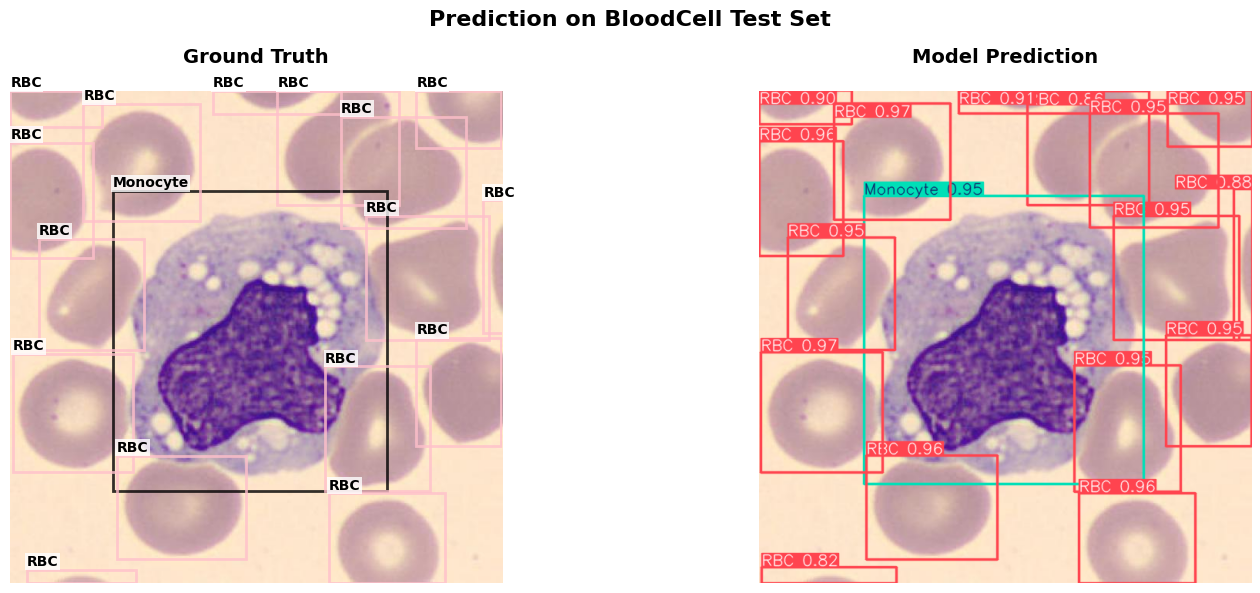

✅ BloodCell Detection Complete!
   📊 Ground truth objects: 17
   🎯 Predicted objects: 17
   🎯 Confidence range: 0.816 - 0.967
   ⭐ Average confidence: 0.931



In [4]:
# Run inference and display side-by-side comparison
results_blood = run_inference_comparison(
    model_path="runs/train/BloodCell_freeze_10/weights/best.pt",
    image_path="Data/BloodCell/test/images/MO_145357_jpg.rf.4d90bd8c31c9a3d6c6db9a17e3f17c38.jpg",
    dataset_name="BloodCell",
    conf=0.5
)

## 🎗️ BreastCancer Dataset Inference

🔍 Running inference on BreastCancer dataset...


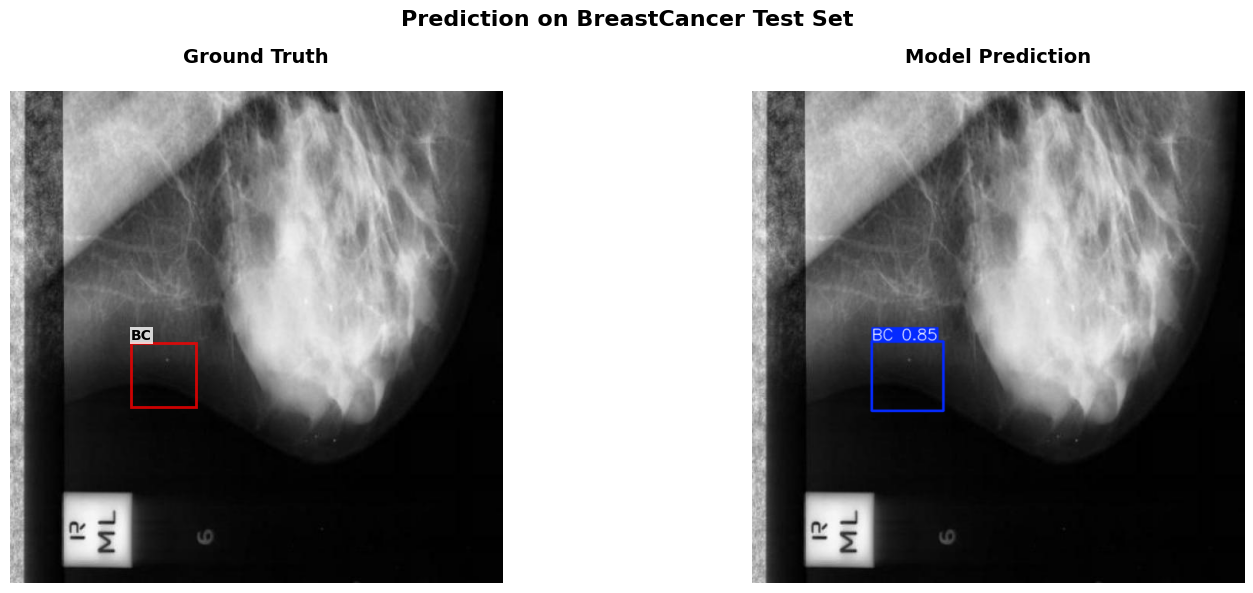

✅ BreastCancer Detection Complete!
   📊 Ground truth objects: 1
   🎯 Predicted objects: 1
   🎯 Confidence range: 0.851 - 0.851
   ⭐ Average confidence: 0.851



In [5]:
# Run inference and display side-by-side comparison
results_breast = run_inference_comparison(
    model_path="runs/train/BreastCancer_freeze_10/weights/best.pt",
    image_path="Data/BreastCancer/test/images/mdb002rl_jpg.rf.583803157ec91fb42177ca1da4de81ae.jpg",
    dataset_name="BreastCancer",
    conf=0.5
)

## 🦴 Fracture Dataset Inference

🔍 Running inference on Fracture dataset...


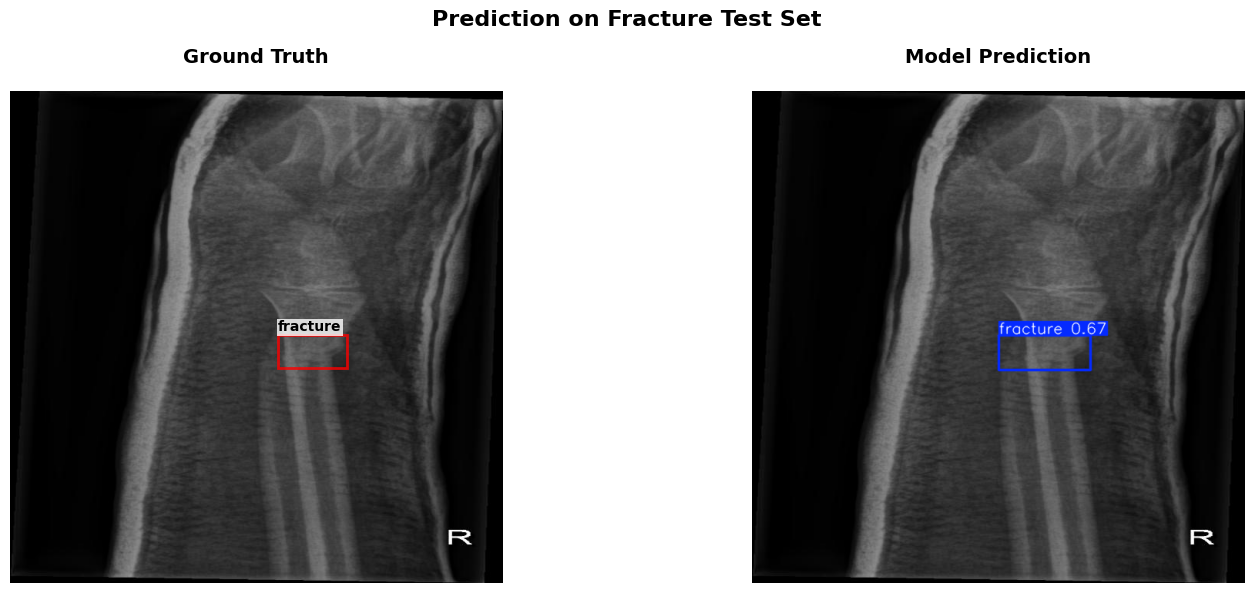

✅ Fracture Detection Complete!
   📊 Ground truth objects: 1
   🎯 Predicted objects: 1
   🎯 Confidence range: 0.675 - 0.675
   ⭐ Average confidence: 0.675



In [6]:
# Run inference and display side-by-side comparison
results_fracture = run_inference_comparison(
    model_path="runs/train/Fracture_freeze_10/weights/best.pt",
    image_path="Data/Fracture/test/images/0003_0663715782_02_WRI-R2_M011_png.rf.bd8df40db107edeadc34fa13851d0c3c.jpg",
    dataset_name="Fracture",
    conf=0.5
)

## 📤 Export YOLO Models to ONNX

In [7]:
# Blood Cell - Half Precision (FP16)
!yolo export model=runs/train/BloodCell_freeze_10/weights/best.pt format=onnx half=True

Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu128 CPU (Intel Xeon Processor (SapphireRapids))
WARNING ⚠️ half=True only compatible with GPU export, i.e. use device=0
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'runs/train/BloodCell_freeze_10/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 11, 8400) (5.2 MB)

ONNX: starting export with onnx 1.19.0 opset 22...
ONNX: slimming with onnxslim 0.1.70...
ONNX: export success ✅ 1.1s, saved as 'runs/train/BloodCell_freeze_10/weights/best.onnx' (10.1 MB)

Export complete (1.2s)
Results saved to /home/student01/runs/train/BloodCell_freeze_10/weights
Predict:         yolo predict task=detect model=runs/train/BloodCell_freeze_10/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/train/BloodCell_freeze_10/weights/best.onnx imgsz=640 data=Data/BloodCell/data.yaml  
Visualize:       https://netron.app
💡 Learn more at https://d

In [8]:
# Breast Cancer
!yolo export model=runs/train/BreastCancer_freeze_10/weights/best.pt format=onnx half=True

Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu128 CPU (Intel Xeon Processor (SapphireRapids))
WARNING ⚠️ half=True only compatible with GPU export, i.e. use device=0
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'runs/train/BreastCancer_freeze_10/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.2 MB)

ONNX: starting export with onnx 1.19.0 opset 22...
ONNX: slimming with onnxslim 0.1.70...
ONNX: export success ✅ 1.1s, saved as 'runs/train/BreastCancer_freeze_10/weights/best.onnx' (10.1 MB)

Export complete (1.2s)
Results saved to /home/student01/runs/train/BreastCancer_freeze_10/weights
Predict:         yolo predict task=detect model=runs/train/BreastCancer_freeze_10/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/train/BreastCancer_freeze_10/weights/best.onnx imgsz=640 data=Data/BreastCancer/data.yaml  
Visualize:       https://netron.app
💡 Learn 

In [9]:
# Fracture
!yolo export model=runs/train/Fracture_freeze_10/weights/best.pt format=onnx half=True

Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu128 CPU (Intel Xeon Processor (SapphireRapids))
WARNING ⚠️ half=True only compatible with GPU export, i.e. use device=0
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'runs/train/Fracture_freeze_10/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.2 MB)

ONNX: starting export with onnx 1.19.0 opset 22...
ONNX: slimming with onnxslim 0.1.70...
ONNX: export success ✅ 1.1s, saved as 'runs/train/Fracture_freeze_10/weights/best.onnx' (10.1 MB)

Export complete (1.2s)
Results saved to /home/student01/runs/train/Fracture_freeze_10/weights
Predict:         yolo predict task=detect model=runs/train/Fracture_freeze_10/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/train/Fracture_freeze_10/weights/best.onnx imgsz=640 data=Data/Fracture/data.yaml  
Visualize:       https://netron.app
💡 Learn more at https://docs.ult

## 📤 Push ONNX Models to Hugging Face Hub

Run these commands to upload the ONNX models with proper metadata and README:

```bash
# Blood Cell ONNX Model
python Push_onnx_to_hub.py \
  --train_dir runs/train/BloodCell_freeze_10 \
  --dataset_name BloodCell \
  --hub_model_id "Jesteban247/yolo11-bloodcell-onnx"

# Breast Cancer ONNX Model
python Push_onnx_to_hub.py \
  --train_dir runs/train/BreastCancer_freeze_10 \
  --dataset_name BreastCancer \
  --hub_model_id "Jesteban247/yolo11-breastcancer-onnx"

# Fracture ONNX Model
python Push_onnx_to_hub.py \
  --train_dir runs/train/Fracture_freeze_10 \
  --dataset_name Fracture \
  --hub_model_id "Jesteban247/yolo11-fracture-onnx"
```

After uploading, you can run inference directly from the Hub:

```bash
yolo predict task=detect model=hf://Jesteban247/yolo11-bloodcell-onnx/best.onnx imgsz=640 source="path/to/image.jpg"
```

## 📤 Upload Models to Roboflow

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="xxxxx")  # Replace with your actual API key
workspace = rf.workspace("med-2fnb4")

print("✅ Roboflow workspace initialized!")

In [ ]:
# Deploy Blood Cell Model
workspace.deploy_model(
    model_type="yolov11",
    model_path="runs/train/BloodCell_freeze_10",
    project_ids=["blood-cell-dataset-qbrgd"],
    model_name="BloodCell-YOLO11",
    filename="weights/best.pt"
)

print("✅ Blood Cell model deployed to Roboflow!")

In [ ]:
# Deploy Breast Cancer Model
workspace.deploy_model(
    model_type="yolov11",
    model_path="runs/train/BreastCancer_freeze_10",
    project_ids=["cancer-detection-dataset-vrorj"],
    model_name="BreastCancer-YOLO11",
    filename="weights/best.pt"
)

print("✅ Breast Cancer model deployed to Roboflow!")

In [ ]:
# Deploy Fracture Model
workspace.deploy_model(
    model_type="yolov11",
    model_path="runs/train/Fracture_freeze_10",
    project_ids=["fracture-dataset-btrwc"],
    model_name="Fracture-YOLO11",
    filename="weights/best.pt"
)

print("✅ Fracture model deployed to Roboflow!")